In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [3]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: observed_values.ipynb
  File: utils.py
  File: xgboost.ipynb
Directory: .\saves
  File: A.csv
  File: B.csv
  File: C.csv
  File: observed_values_test.csv
  File: submission.csv
Directory: .\__pycache__
  File: utils.cpython-310.pyc


In [4]:
Y_train_a = pd.read_parquet('../data/A/train_targets.parquet')
Y_train_b = pd.read_parquet('../data/B/train_targets.parquet')
Y_train_c = pd.read_parquet('../data/C/train_targets.parquet')

In [5]:
X_train_estimated_a = pd.read_parquet('../data/A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('../data/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('../data/C/X_train_estimated.parquet')


In [6]:
X_train_observed_a = pd.read_parquet('../data/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('../data/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('../data/C/X_train_observed.parquet')


In [7]:
X_test_estimated_a = pd.read_parquet('../data/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('../data/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('../data/C/X_test_estimated.parquet')


In [8]:
# EDA
display(X_test_estimated_a.head(5))

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2023-04-30 07:00:04,2023-05-01 00:00:00,4.4,1.286,912.700012,0.0,0.0,1041.199951,0.0,271.700012,0.0,0.0,0.0,0.0,80.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.0,0.0,1000.700012,1007.000000,0.0,0.0,80.300003,1013.299988,NaN,0.0,0.0,0.0,0.0,10.520000,-11.185,0.0,273.799988,80.699997,30210.699219,4.0,2.2,3.4,-0.0
1,2023-04-30 07:00:04,2023-05-01 00:15:00,4.3,1.287,912.700012,0.0,0.0,1054.800049,0.0,271.700012,0.0,0.0,0.0,0.0,77.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.700012,0.0,0.0,1000.599976,1006.900024,0.0,0.0,80.300003,1013.200012,NaN,0.0,0.0,0.0,0.0,14.203000,-10.825,0.0,273.799988,77.000000,30003.599609,4.0,2.1,3.4,-0.0
2,2023-04-30 07:00:04,2023-05-01 00:30:00,4.3,1.287,912.700012,0.0,0.0,1068.300049,0.0,271.600006,0.0,0.0,0.0,0.0,73.099998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.599976,0.0,0.0,1000.500000,1006.700012,0.0,0.0,80.300003,1013.000000,NaN,0.0,0.0,0.0,0.0,17.868999,-10.360,0.0,273.799988,73.099998,29797.099609,3.9,2.1,3.3,-0.0
3,2023-04-30 07:00:04,2023-05-01 00:45:00,4.3,1.287,912.700012,0.0,0.0,1081.900024,0.0,271.600006,0.0,0.0,0.0,0.0,69.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.500000,0.0,0.0,1000.400024,1006.599976,0.0,0.0,80.199997,1012.900024,NaN,0.0,0.0,0.0,0.0,21.514000,-9.794,0.0,273.799988,69.000000,29618.599609,3.9,2.0,3.3,-0.0
4,2023-04-30 07:00:04,2023-05-01 01:00:00,4.3,1.287,NaN,0.0,0.0,1095.400024,0.0,271.600006,0.0,0.0,0.0,0.0,64.500000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.299988,0.0,0.0,1000.200012,1006.500000,0.0,0.0,80.199997,1012.799988,NaN,0.0,0.0,0.0,0.0,25.135000,-9.128,0.0,273.799988,64.500000,29507.500000,3.9,2.0,3.3,-0.0


<Axes: title={'center': 'Y_train C'}, xlabel='time'>

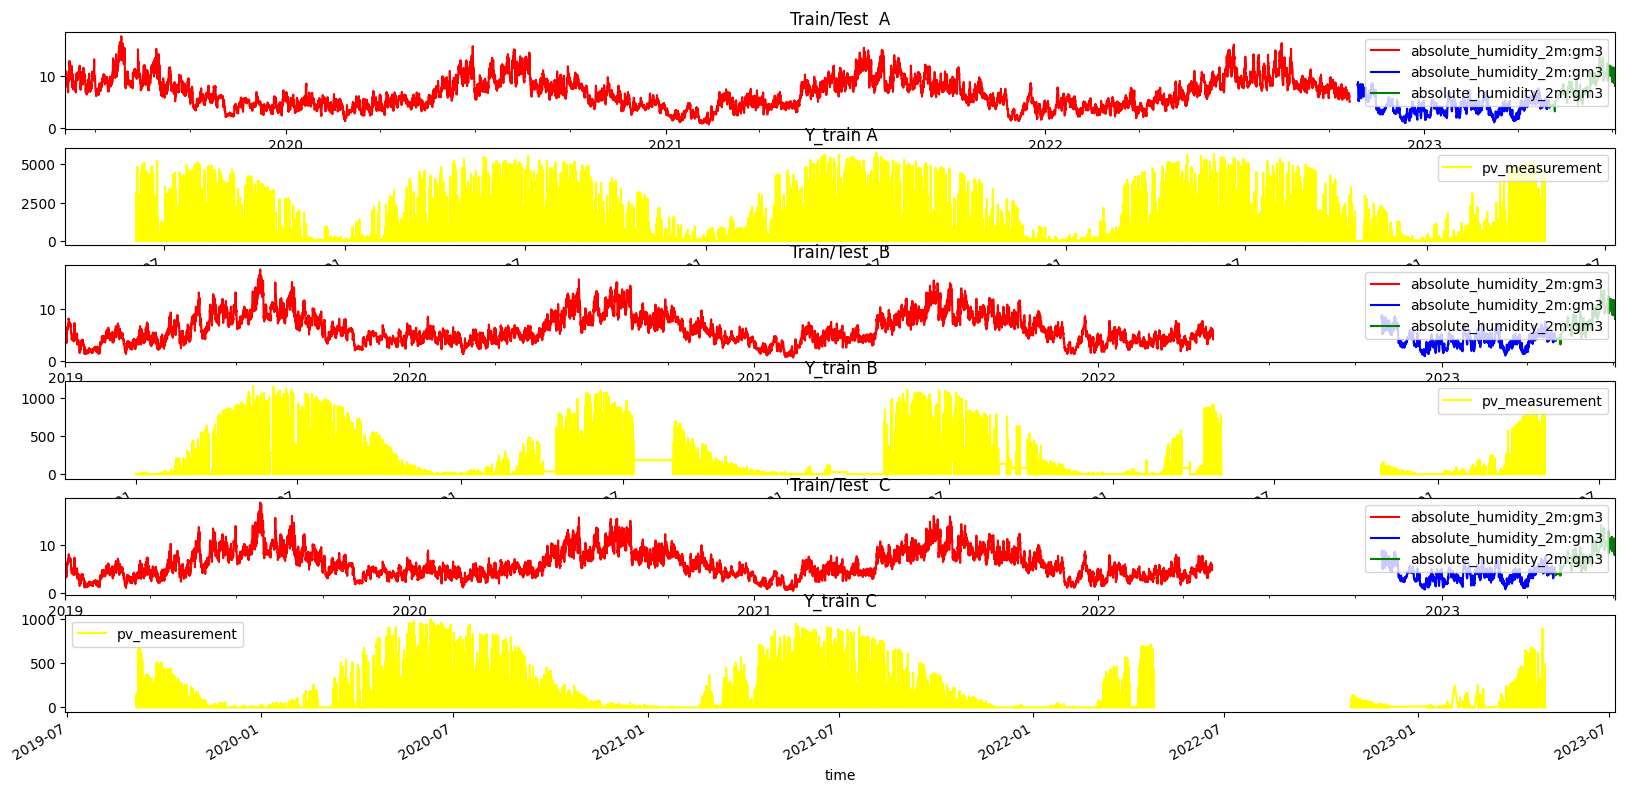

In [9]:
# Plotting a single feature
fig, axs = plt.subplots(6, 1, figsize=(20, 10), sharex=False)
feature_name = 'absolute_humidity_2m:gm3'

X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')
Y_train_a[['time', 'pv_measurement']].set_index('time').plot(ax=axs[1], title='Y_train A', color="yellow")

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  B', color='green')
Y_train_b[['time', 'pv_measurement']].set_index('time').plot(ax=axs[3], title='Y_train B', color="yellow")

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[4], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[4], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[4], title='Train/Test  C', color='green')
Y_train_c[['time', 'pv_measurement']].set_index('time').plot(ax=axs[5], title='Y_train C', color="yellow")

In [10]:
display(Y_train_a.iloc[5090])

time              2020-01-01 00:00:00
pv_measurement                    0.0
Name: 5090, dtype: object

In [11]:
test = pd.read_csv('../data/test.csv')
test


,id,time,prediction,location
0,0,2023-05-01 00:00:00,0,A
1,1,2023-05-01 01:00:00,0,A
2,2,2023-05-01 02:00:00,0,A
3,3,2023-05-01 03:00:00,0,A
4,4,2023-05-01 04:00:00,0,A
...,...,...,...,...
2155,2155,2023-07-03 19:00:00,0,C
2156,2156,2023-07-03 20:00:00,0,C
2157,2157,2023-07-03 21:00:00,0,C
2158,2158,2023-07-03 22:00:00,0,C


In [12]:
# Use observed y-values as predictions to see how it performs. Use years where we know data looks good.
print(Y_train_a["time"].dtype)
A_pred = Y_train_a[(Y_train_a['time'] >= '2020-05-01 00:00:00') & (Y_train_a['time'] <= '2020-07-03 23:00:00')]
B_pred = Y_train_b[(Y_train_b['time'] >= '2019-05-01 00:00:00') & (Y_train_b['time'] <= '2019-07-03 23:00:00')]
C_pred = Y_train_c[(Y_train_c['time'] >= '2020-05-01 00:00:00') & (Y_train_c['time'] <= '2020-07-03 23:00:00')]

# Prepare dataframes for merging, as in artificially change year to 2023 so it matches test.csv
for index, row in A_pred.iterrows():
    date_time = row["time"].strftime("2023-%m-%d %H:%M:%S")
    A_pred.at[index, "time"] = date_time

for index, row in B_pred.iterrows():
    date_time = row["time"].strftime("2023-%m-%d %H:%M:%S")
    B_pred.at[index, "time"] = date_time
    
for index, row in C_pred.iterrows():
    date_time = row["time"].strftime("2023-%m-%d %H:%M:%S")
    C_pred.at[index, "time"] = date_time

test["time"] = test["time"].astype('datetime64[us]')

merged_A = pd.merge(test.iloc[:720], A_pred, on="time", how="left")
merged_A["prediction"] = merged_A["pv_measurement"]
merged_A.to_csv("saves/A.csv", index=False)

merged_B = pd.merge(test.iloc[720:1440], B_pred, on="time", how="left")
merged_B["prediction"] = merged_B["pv_measurement"]
merged_B.to_csv("saves/B.csv", index=False)

merged_C = pd.merge(test.iloc[1440:], C_pred, on="time", how="left")
merged_C["prediction"] = merged_C["pv_measurement"]
merged_C.to_csv("saves/C.csv",index=False)

final = pd.concat([merged_A, merged_B, merged_C], ignore_index=True)
final.to_csv("saves/observed_values_test.csv", index=False)

submission = final.drop(columns=["time", "location", "pv_measurement"])
submission.to_csv("saves/submission.csv", index=False)


datetime64[us]
